In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [14]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

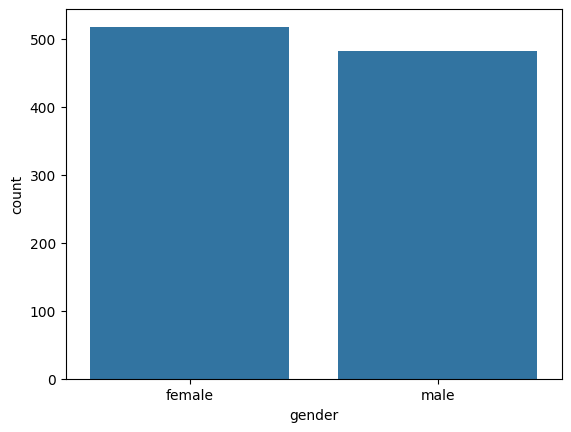

In [23]:
sns.countplot(x=df['gender'])

<Axes: xlabel='math_score', ylabel='Count'>

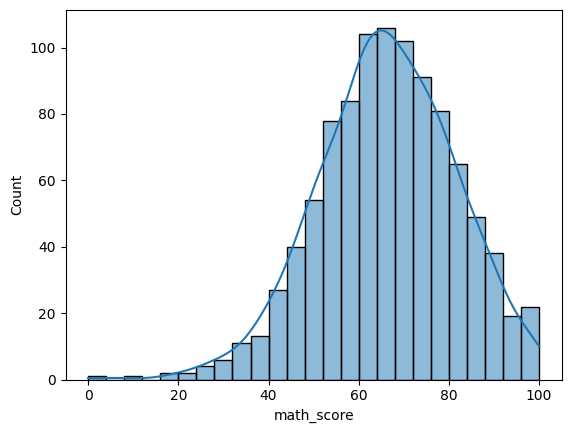

In [25]:
sns.histplot(x=df['math_score'],kde=True)

<Axes: xlabel='reading_score'>

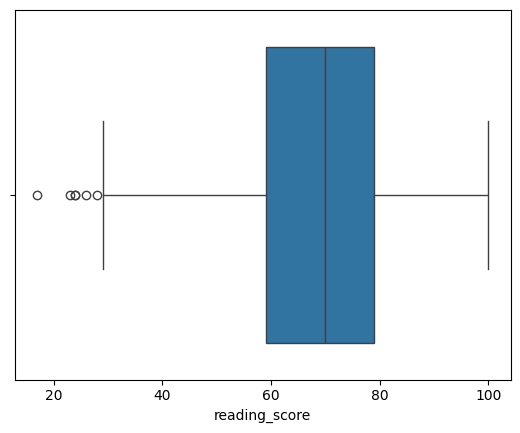

In [27]:
sns.boxplot(x=df['reading_score'])

In [31]:
numeric=[i for i in df.columns if df[i].dtype!='object']
categorical=[i for i in df.columns if df[i].dtype=='object']

In [34]:
numeric

['math_score', 'reading_score', 'writing_score']

In [38]:
df["total"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["avg"]=df["total"]/3

In [43]:
fullm=df[df["math_score"]==100]["gender"].count()
fullm

7

<Axes: xlabel='avg', ylabel='Count'>

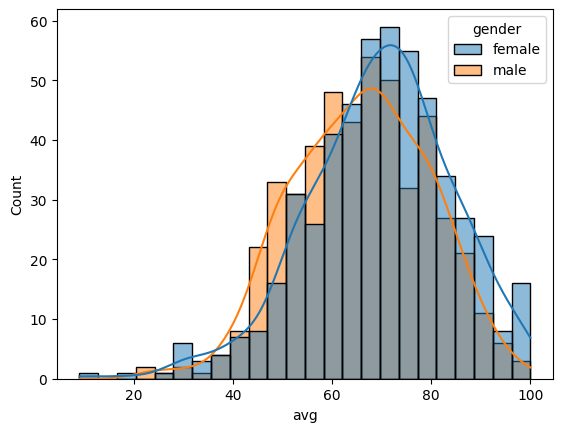

In [54]:
sns.histplot(data=df,x="avg",kde=True,hue="gender")

([<matplotlib.patches.Wedge at 0x282d4f749a0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.2%')])

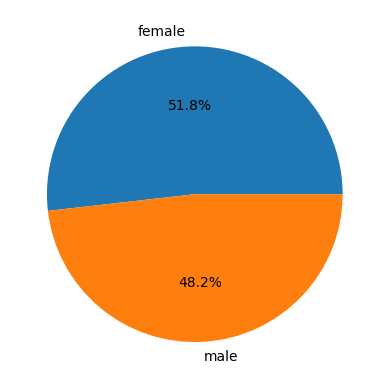

In [63]:
val=df['gender'].value_counts()
plt.pie(val.values,labels=val.index,autopct="%1.1f%%")

In [65]:
gender_group = df.groupby("gender").mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total,avg
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Axes: xlabel='race_ethnicity', ylabel='Count'>

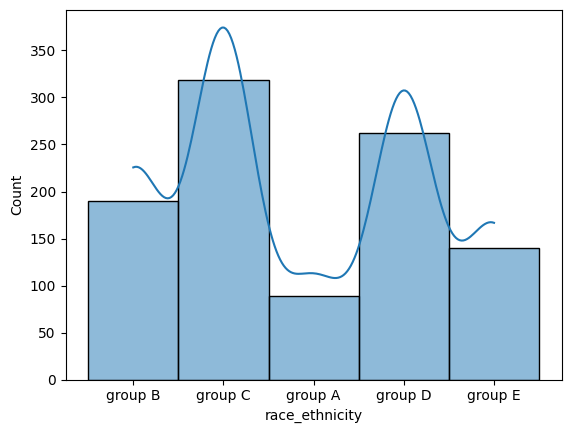

In [67]:
sns.histplot(x=df['race_ethnicity'],kde=True)

In [69]:
gender_group = df.groupby("race_ethnicity").mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total,avg
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


In [70]:
gender_group = df.groupby('parental_level_of_education').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total,avg
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


<Axes: xlabel='avg'>

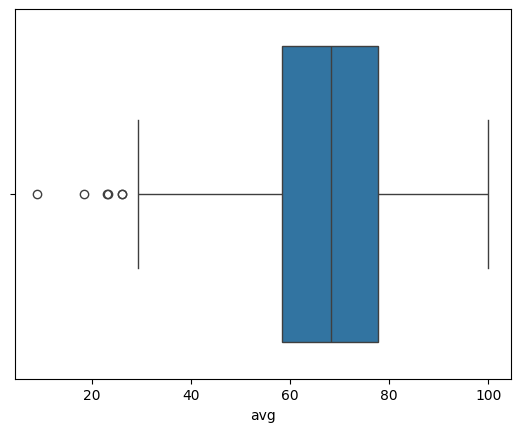

In [71]:
sns.boxplot(x=df['avg'])

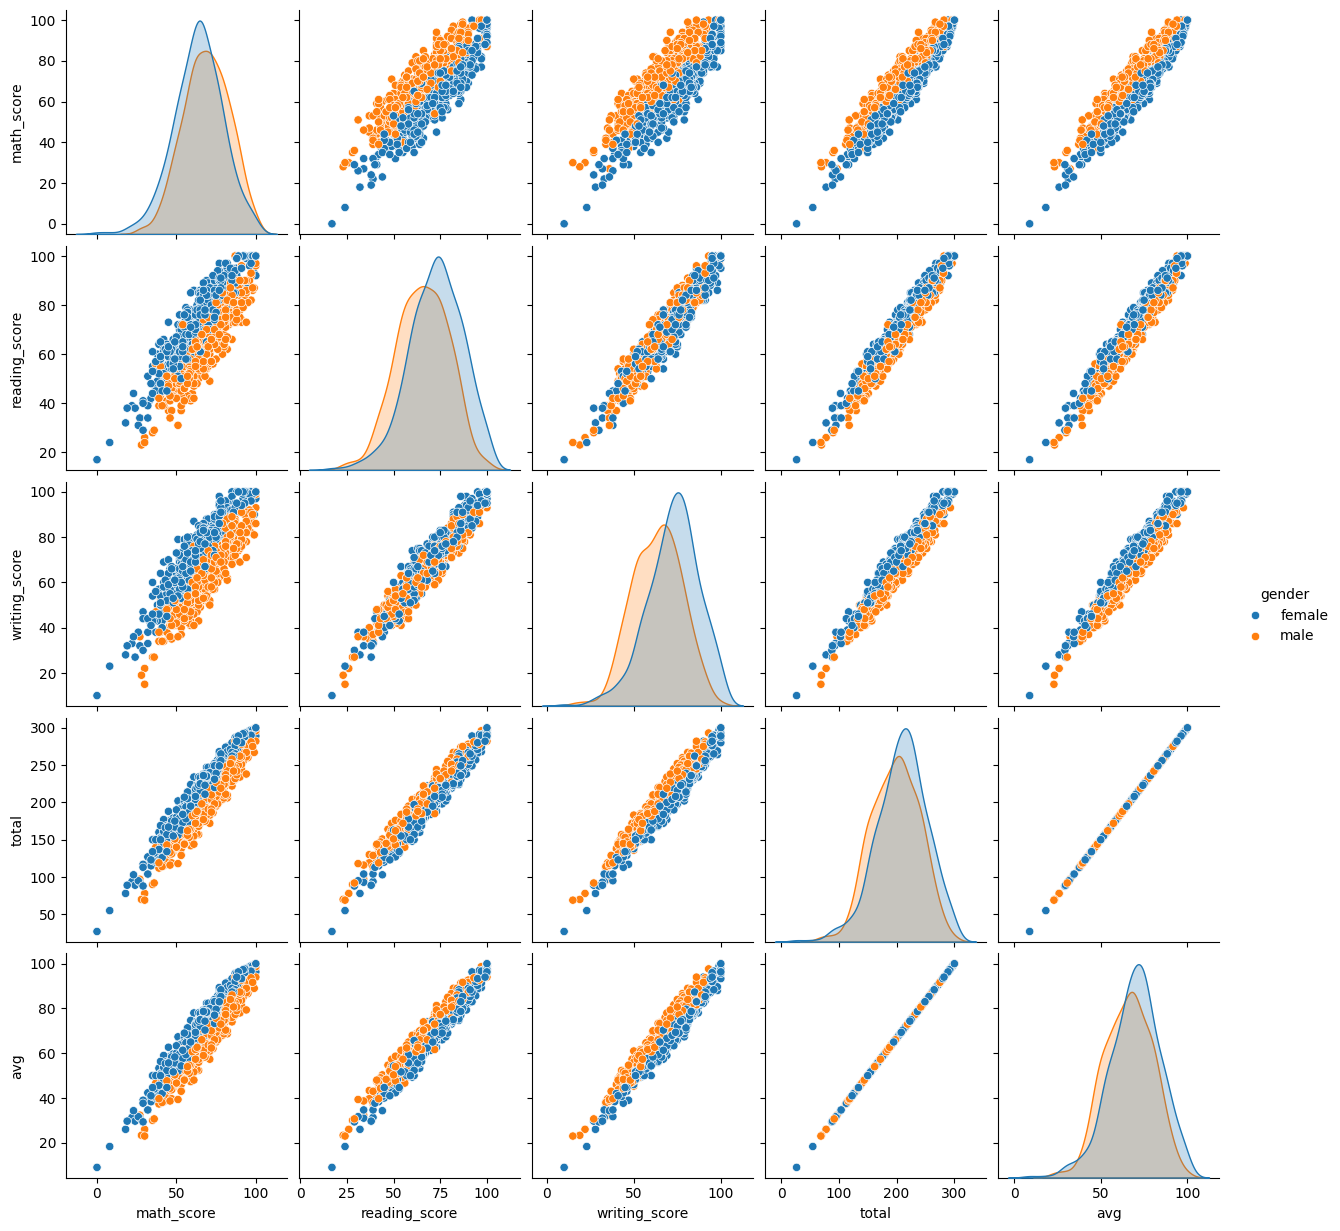

In [73]:
sns.pairplot(df,hue='gender')
plt.show()

In [75]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [76]:
gender_group = df.groupby('test_preparation_course').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total,avg
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941
